# 1. 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/KUBIG/23-2_Project/health/data"
# PATH = "/content/drive/MyDrive/KUBIG_23_2_Project/국민체육진흥공단/data"

## 1-1: A-전국공공체육시설 데이터

In [ ]:
A = pd.read_csv(PATH+"/A/A.csv")

In [ ]:
A.head()

,FCLTY_NM,FCLTY_SDIV_CD,FCLTY_FLAG_NM,INDUTY_CD,INDUTY_NM,FCLTY_TY_CD,FCLTY_TY_NM,POSESN_MBY_CD,POSESN_MBY_NM,POSESN_MBY_CTPRVN_CD,...,RDNMADR_NM,FCLTY_LO,FCLTY_LA,FCLTY_AR_CO,ACMD_NMPR_CO,ADTM_CO,FCLTY_HMPG_URL,NATION_ALSFC_AT,FCLTY_STATE_CD,DEL_AT
0,(외립석입구),P,공공,P08,간이운동장,P0801,간이운동장,1.0,지방자치단체,4.700000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,N
1,(자산경로당),P,공공,P08,간이운동장,P0801,간이운동장,1.0,지방자치단체,4.700000e+09,...,경상북도 김천시 자산3길 16 (성내동),128.122092,36.120771,NaN,NaN,NaN,NaN,N,0,N
2,신리 봉계초등학교 (강당뒤),P,공공,P08,간이운동장,P0801,간이운동장,1.0,지방자치단체,4.700000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,N
3,신리 봉계초등학교 (강당뒤),P,공공,P08,간이운동장,P0801,간이운동장,1.0,지방자치단체,4.700000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,Y
4,배구장,P,공공,P08,간이운동장,P0801,간이운동장,1.0,지방자치단체,4.800000e+09,...,경남 함양군 서하면 송계리 1230-6,127.693186,35.648683,NaN,NaN,NaN,NaN,N,0,N


In [ ]:
# 시설명, 업종명, 소유주체명, 도로명시도명, 도로명시군구명, 도로명읍면동명, 시설경도, 시설위도 컬럼만 사용
A1 = A[['FCLTY_NM','INDUTY_NM','POSESN_MBY_NM','ROAD_NM_CTPRVN_NM','ROAD_NM_SIGNGU_NM','ROAD_NM_EMD_NM','FCLTY_LO','FCLTY_LA']]

## 1-2: B-체육생활이용정보

In [ ]:
B = pd.read_csv(PATH+"/B/B.csv")

In [ ]:
B.head()

,BASE_YM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,SIGNGU_ACCTO_POPLTN_CO,MAIN_DMAND_FCLTY_FLAG_NM,MAIN_DMAND_FCLTY_NM,SIGNGU_ACCTO_FCLTY_CO,PSNBY_FCLTY_CO,PSNBY_FCL_CO_RANK_CO
0,202008,1100000000,서울특별시,1111000000,종로구,149962,자주이용하는 공공시설 1순위,간이운동장,28,0.00019,132
1,202008,1100000000,서울특별시,1111000000,종로구,149962,자주이용하는 민간시설 1순위,체력단련장,47,0.00031,6
2,202008,1100000000,서울특별시,1111000000,종로구,149962,자주이용하는 공공시설 2순위,체력단련장,3,0.00002,66
3,202008,1100000000,서울특별시,1111000000,종로구,149962,자주이용하는 민간시설 2순위,골프장/골프연습장,25,0.00017,123
4,202008,1100000000,서울특별시,1111000000,종로구,149962,자주이용하는 공공시설 3순위,수영장,3,0.00002,34


In [ ]:
# 기준연월, 시도명, 시군구명, 시군구별인구수,메인수요시설구분명, 메인수요시설명,시군구별시설수만 선택
B1 = B[['BASE_YM','CTPRVN_NM','SIGNGU_NM','SIGNGU_ACCTO_POPLTN_CO','MAIN_DMAND_FCLTY_FLAG_NM','MAIN_DMAND_FCLTY_NM','SIGNGU_ACCTO_FCLTY_CO']]

In [ ]:
# 메인수요시설구분명이 '자주이용하는 공공시설 n순위' 인 것만 남기기
B1_1 = B1[B1['MAIN_DMAND_FCLTY_FLAG_NM']=='자주이용하는 공공시설 1순위']
B1_2 = B1[B1['MAIN_DMAND_FCLTY_FLAG_NM']=='자주이용하는 공공시설 2순위']
B1_3 = B1[B1['MAIN_DMAND_FCLTY_FLAG_NM']=='자주이용하는 공공시설 3순위']
B1_4 = B1[B1['MAIN_DMAND_FCLTY_FLAG_NM']=='자주이용하는 공공시설 4순위']
B1_5 = B1[B1['MAIN_DMAND_FCLTY_FLAG_NM']=='자주이용하는 공공시설 5순위']

In [ ]:
B2 = pd.concat([B1_1,B1_2,B1_3,B1_4,B1_5])

In [ ]:
# 메인수요시설구분명이 '자주이용하는 공공시설 1순위'이면 '인기순위' 변수를 1 / 2 ->2 / 3->3 / 4->4 / 5->5 로 바꾼 뒤, '메인수요시설구분명'변수 제거
B2['popularity']=0

In [ ]:
B2.loc[B2['MAIN_DMAND_FCLTY_FLAG_NM'] == '자주이용하는 공공시설 1순위', 'popularity'] = 1
B2.loc[B2['MAIN_DMAND_FCLTY_FLAG_NM'] == '자주이용하는 공공시설 2순위', 'popularity'] = 2
B2.loc[B2['MAIN_DMAND_FCLTY_FLAG_NM'] == '자주이용하는 공공시설 3순위', 'popularity'] = 3
B2.loc[B2['MAIN_DMAND_FCLTY_FLAG_NM'] == '자주이용하는 공공시설 4순위', 'popularity'] = 4
B2.loc[B2['MAIN_DMAND_FCLTY_FLAG_NM'] == '자주이용하는 공공시설 5순위', 'popularity'] = 5

In [ ]:
B2=B2.drop('MAIN_DMAND_FCLTY_FLAG_NM',axis=1)

In [ ]:
#각 시설별로, 가장 최근의 데이터만 사용
B3 = B2[B2['BASE_YM']==202111]

In [ ]:
#어떤 지역이든 공공시설 top 1~5는 간이운동장/체력단련장/수영장/축구장/테니스장임을 확인.
B3['MAIN_DMAND_FCLTY_NM'].value_counts()

간이운동장    231
체력단련장    231
수영장      231
축구장      231
테니스장     231
Name: MAIN_DMAND_FCLTY_NM, dtype: int64

## 1-3: C-체육시설안전점검정보

In [ ]:
C = pd.read_csv(PATH+"/C/C.csv")

In [ ]:
C.head()

,FCLTY_NM,FCLTY_NCM_NM,FCLTY_CL_CD,FCLTY_CL_NM,INDUTY_CD,INDUTY_NM,FCLTY_TY_CD,FCLTY_TY_NM,CMPTNC_CTPRVN_CD,CMPTNC_CTPRVN_NM,...,FCLTY_TOTAR_CO,OPER_STATE_CD,OPER_STATE_NM,OPER_CLSBIZ_DE,FCLTY_INFO_UPDT_DE,SAFECHK_GNRLZ_GRAD_CD,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,SAFECHK_OTHBC_DE,FCLTY_INFO_REGIST_DE
0,(주)한샘레포츠타운(공단점),NaN,N,신고업,N10,체력단련장업,N1001,체력단련장,4100000000,경기도,...,911.0,0,정상운영,NaN,20170226,99,없음,NaN,NaN,20161231
1,볼&큐 빌리어드클럽,NaN,N,신고업,N11,당구장업,N1101,당구장,4100000000,경기도,...,189.0,0,정상운영,NaN,20190114,1,양호,20201024.0,20210131.0,20161231
2,뽀록 당구장,NaN,N,신고업,N11,당구장업,N1101,당구장,4100000000,경기도,...,74.0,0,정상운영,NaN,20181231,99,없음,NaN,NaN,20161107
3,안산 용인대 청룡 태권도장,NaN,N,신고업,N08,체육도장업,N0805,태권도,4100000000,경기도,...,127.0,0,정상운영,NaN,20161231,1,양호,20201231.0,20210131.0,20161231
4,사동 용인대 올림픽 태권도장,NaN,N,신고업,N08,체육도장업,N0805,태권도,4100000000,경기도,...,240.0,0,정상운영,NaN,20191128,1,양호,20201021.0,20210131.0,20161231


In [ ]:
# 변수 선택: FCLTY_NM. FCLTY_CL_CD(일부 추출용), INDUTY_NM( ~~업으로 되어 있는데 '업'자 제거해야 다른 데이터프레임이랑 병합 가능), 관할시도명, 관할시군구명, 시설좌표경도, 시설좌표위도, 안전점검종합등급명, 안전점검일자
# 시설총면적 변수는 모든 값이 NaN
C1 = C[['FCLTY_NM','FCLTY_CL_CD','INDUTY_NM','CMPTNC_CTPRVN_NM','CMPTNC_SIGNGU_NM','FCLTY_CRDNT_LO','FCLTY_CRDNT_LA','SAFECHK_GNRLZ_GRAD_NM','SAFECHK_DE']]

In [ ]:
C1.head()

,FCLTY_NM,FCLTY_CL_CD,INDUTY_NM,CMPTNC_CTPRVN_NM,CMPTNC_SIGNGU_NM,FCLTY_CRDNT_LO,FCLTY_CRDNT_LA,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE
0,(주)한샘레포츠타운(공단점),N,체력단련장업,경기도,안산시,126.797270,37.314431,없음,NaN
1,볼&큐 빌리어드클럽,N,당구장업,경기도,안산시,126.869468,37.296411,양호,20201024.0
2,뽀록 당구장,N,당구장업,경기도,성남시,127.157936,37.448107,없음,NaN
3,안산 용인대 청룡 태권도장,N,체육도장업,경기도,안산시,126.862696,37.294169,양호,20201231.0
4,사동 용인대 올림픽 태권도장,N,체육도장업,경기도,안산시,126.851427,37.305689,양호,20201021.0


In [ ]:
# FCLTY_CL_CD가 P인 것만 선택(공공시설) 후 해당 변수는 제거
C1 = C1[C1['FCLTY_CL_CD']=='P']

In [ ]:
C2 = C1.drop('FCLTY_CL_CD',axis=1)

In [ ]:
# '업' 글자 제거
C2['INDUTY_NM'] = C2['INDUTY_NM'].str.rstrip('업')

In [ ]:
C2

,FCLTY_NM,INDUTY_NM,CMPTNC_CTPRVN_NM,CMPTNC_SIGNGU_NM,FCLTY_CRDNT_LO,FCLTY_CRDNT_LA,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE
872,(평창)청성골프타운(임대),골프연습장,강원도,평창군,128.385555,37.377363,없음,NaN
873,(취약시설)서구국민체육센터,체육관,광주광역시,서구,126.880984,35.130046,없음,NaN
874,(취약시설)일가정양립지원본부 실내수영장,수영장,광주광역시,서구,126.842220,35.152219,없음,NaN
875,(취약시설)광주광역시서구문화센터,기타시설,광주광역시,서구,126.860323,35.130826,없음,NaN
877,(이순신종합운동장)보조경기장,축구장,충청남도,아산시,127.022374,36.768875,없음,NaN
...,...,...,...,...,...,...,...,...
80624,대화레포츠공원 X게임장,기타시설,경기도,고양시,126.737099,37.669918,양호,20201201.0
80625,안양천고척교하부X게임장,롤러스케이트장,서울특별시,구로구,126.872832,37.499543,양호,20191209.0
80632,X-게임장,기타시설,대구광역시,동구,128.692840,35.859924,없음,NaN
80819,용인시여성회관YMCA스포츠센타,체육관,경기도,용인시,127.095500,37.320524,없음,NaN


## 1-4: D-여가 활용방안(연령별)

In [ ]:
D = pd.read_csv(PATH+"/D/D.csv",encoding= 'CP949')

In [ ]:
D.head()

,연령,TV시청,친구_동호회모임,인터넷,낮잠,통화하기_문자보내기,게임,쇼핑_외식,목욕_사우나_찜질방,음주,...,웨이크보드,스케이팅,화초가꾸기,패러글라이딩,수상스키,유람선 타기,피겨스케이팅,미식축구,무도,사례수
0,10대,52.9,26.9,48.9,10.1,22.0,37.6,4.1,1.8,0.6,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,"1,305"
1,20대,42.5,30.0,43.5,11.5,14.4,17.9,14.7,3.8,7.1,...,0.1,0.0,0.0,0.0,0.1,0,0,0,0,"1,316"
2,30대,62.4,23.7,30.8,20.7,12.5,10.1,14.9,9.6,11.4,...,0.1,0.0,0.0,0.1,0.0,0,0,0,0,"1,614"
3,40대,70.7,21.9,13.3,22.8,9.5,3.9,13.6,14.6,13.5,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,"1,730"
4,50대,73.8,23.3,4.8,25.0,9.3,1.3,10.9,15.9,13.3,...,0.0,0.1,0.0,0.0,0.0,0,0,0,0,"1,468"


In [ ]:
#여가 카테고리 종류 확인
D.columns.tolist()

['연령',
 'TV시청',
 '친구_동호회모임',
 '인터넷',
 '낮잠',
 '통화하기_문자보내기',
 '게임',
 '쇼핑_외식',
 '목욕_사우나_찜질방',
 '음주',
 '산책',
 '걷기',
 '음악 감상',
 '영화보기',
 '등산',
 '사교모임',
 '종교활동',
 '신문_잡지보기',
 '독서',
 '헬스',
 '가족 및 친지방문',
 '이성교제_미팅_소개팅',
 '축구',
 '등산.1',
 '수영',
 '자전거',
 '드라이브',
 '바둑_장기_체스',
 '배드민턴',
 '미니홈피_블로그 관리',
 '라디오 청취',
 '낚시',
 '요리하기_다도',
 '요가',
 '골프',
 '농구',
 '애완동물 돌보기',
 '위에서 분류되지 않은 기타 여가활동',
 '낚시.1',
 '줄넘기_훌라후프',
 '미용',
 '노래방',
 '스포츠 경기관람',
 '비디오 시청',
 '사회봉사활동',
 '당구',
 '탁구',
 '겜블_복권구입',
 '생활공예',
 '보드게임_퍼즐_큐브맞추기',
 '야구',
 '자격증취득공부_학원',
 '에어로빅',
 '족구',
 '소풍_야유회',
 '테니스',
 '댄스스포츠',
 '볼링',
 '체조',
 '게이트볼',
 '인테리어',
 '태권도',
 '악기연주_노래교실',
 '클럽가기',
 '육상',
 '자연명승_풍경 관람',
 '놀이공원_동물원_식물원 가기',
 '마라톤',
 '사진촬영',
 '테마파크 가기',
 '전시회 관람',
 '서예',
 '산악자전거',
 '승마',
 '연극공연 관람',
 '수집활동',
 '온천_해수욕',
 '지역축제 참가',
 '수중스포츠',
 '온라인게임 경기 관람',
 '미술활동',
 '그 외 종목',
 '삼림욕',
 '석궁_양궁_국궁',
 '스쿼시',
 '국내캠핑',
 '전통예술 배우기',
 '춤_무용',
 '격투기',
 '박물관 관람',
 '스노우보드',
 '문학행사참여',
 '암벽등반',
 '전통예술공연 관람',
 '검도',
 '배구',
 '문화유적방문',
 '인라인스케이트',
 '스키',
 '음악

- 간이운동장과 관련된 여가: 산책, 걷기, 자전거, 줄넘기_훌라후프, 야구, 체조, 육상, 마라톤, 인라인스케이트
- 체력단련장과 관련된 여가: 헬스, 요가, 농구, 당구, 탁구, 족구, 배드민턴, 게이트볼, 스쿼시, 배구, 라켓볼
- 수영장과 관련된 여가: 수영, 수중스포츠
- 축구장과 관련된 여가: 축구
- 테니스장과 관련된 여가: 테니스

In [ ]:
# D 데이터프레임 마지막에 '간이운동장 수요', '체력단련장 수요' ... 등 총 5개 컬럼 추가, 각각에 대한 비율 합해서 구하기
D['간이운동장_수요'] = D['걷기']+D['산책']+D['자전거']+D['줄넘기_훌라후프']+D['야구']+D['체조']+D['육상']+D['마라톤']+D['인라인스케이트']
D['체력단련장_수요'] = D['헬스']+D['요가']+D['농구']+D['당구']+D['탁구']+D['족구']+D['배드민턴']+D['게이트볼']+D['스쿼시']+D['배구']+D['라켓볼']
D['수영장_수요'] = D['수영']+D['수중스포츠']
D['축구장_수요'] = D['축구']
D['테니스장_수요'] = D['테니스']

In [ ]:
D.head()

,연령,TV시청,친구_동호회모임,인터넷,낮잠,통화하기_문자보내기,게임,쇼핑_외식,목욕_사우나_찜질방,음주,...,유람선 타기,피겨스케이팅,미식축구,무도,사례수,간이운동장_수요,체력단련장_수요,수영장_수요,축구장_수요,테니스장_수요
0,10대,52.9,26.9,48.9,10.1,22.0,37.6,4.1,1.8,0.6,...,0,0,0,0,"1,305",8.2,7.3,0.6,7.9,0.0
1,20대,42.5,30.0,43.5,11.5,14.4,17.9,14.7,3.8,7.1,...,0,0,0,0,"1,316",9.9,12.0,1.6,3.2,0.3
2,30대,62.4,23.7,30.8,20.7,12.5,10.1,14.9,9.6,11.4,...,0,0,0,0,"1,614",14.9,10.3,2.3,2.2,0.5
3,40대,70.7,21.9,13.3,22.8,9.5,3.9,13.6,14.6,13.5,...,0,0,0,0,"1,730",23.1,9.0,2.2,2.1,0.4
4,50대,73.8,23.3,4.8,25.0,9.3,1.3,10.9,15.9,13.3,...,0,0,0,0,"1,468",30.3,6.6,2.8,0.6,0.5


In [ ]:
#필요한 것만 추출
D_2 = D.iloc[:, [0] + list(range(120, 125))]

In [ ]:
D_2

,연령,간이운동장_수요,체력단련장_수요,수영장_수요,축구장_수요,테니스장_수요
0,10대,8.2,7.3,0.6,7.9,0.0
1,20대,9.9,12.0,1.6,3.2,0.3
2,30대,14.9,10.3,2.3,2.2,0.5
3,40대,23.1,9.0,2.2,2.1,0.4
4,50대,30.3,6.6,2.8,0.6,0.5
5,60대,39.9,3.7,2.3,0.2,0.3
6,70대이상,38.1,4.0,1.2,0.2,0.0


## 1-5. 데이터 병합

In [ ]:
A1['INDUTY_NM'].value_counts() # 체력단련장의 명칭이 '기타체육시설(체력단련장)'

간이운동장            23277
전천후게이트볼장          1830
기타시설              1476
체육관               1250
축구장               1212
테니스장               888
수영장                479
국궁장                321
육상경기장              300
야구장                300
롤러스케이트장            194
골프연습장              139
기타체육시설(체력단련장)       71
씨름장                 70
빙상장                 33
사격장                 32
양궁장                 30
승마장                 29
하키장                 18
요트장                 16
사이클경기장              14
조정카누장               13
골프장                 12
인공암벽장업               7
설상경기장                6
수영장업                 1
Name: INDUTY_NM, dtype: int64

In [ ]:
top_5_induty=['간이운동장','기타체육시설(체력단련장)','수영장','축구장','테니스장']
final_1=A1[A1['INDUTY_NM'].apply(lambda x:x in top_5_induty)]
final_1['INDUTY_NM'].value_counts()

간이운동장            23277
축구장               1212
테니스장               888
수영장                479
기타체육시설(체력단련장)       71
Name: INDUTY_NM, dtype: int64

In [ ]:
B3[['MAIN_DMAND_FCLTY_NM','popularity']].value_counts() # 모든 구의 popularity가 '간이운동장','기타체육시설(체력단련장)','수영장','축구장','테니스장' 순서

MAIN_DMAND_FCLTY_NM  popularity
간이운동장                1             231
수영장                  3             231
체력단련장                2             231
축구장                  4             231
테니스장                 5             231
dtype: int64

In [ ]:
#popularity(1~5) 값 추가
popularity_dict={'간이운동장':1,'기타체육시설(체력단련장)':2,'수영장':3,'축구장':4,'테니스장':5}
final_1['popularity']=final_1['INDUTY_NM'].apply(lambda x: popularity_dict[x])

<ipython-input-39-00426a85ef2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1['popularity']=final_1['INDUTY_NM'].apply(lambda x: popularity_dict[x])


In [ ]:
final_1=final_1.drop_duplicates()

In [ ]:
final_1.isna().sum()

FCLTY_NM                 0
INDUTY_NM                0
POSESN_MBY_NM          300
ROAD_NM_CTPRVN_NM        1
ROAD_NM_SIGNGU_NM      145
ROAD_NM_EMD_NM       11304
FCLTY_LO              1742
FCLTY_LA              1742
popularity               0
dtype: int64

In [ ]:
final_1[final_1['FCLTY_LO'].isnull()]['ROAD_NM_EMD_NM'].isna().sum() #-> 위경도가 null이면 동도 거의 null, na drop

1734

In [ ]:
final_1=final_1.dropna(subset=['FCLTY_LO','FCLTY_LA'])

In [ ]:
final_1

,FCLTY_NM,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,FCLTY_LO,FCLTY_LA,popularity
1,(자산경로당),간이운동장,지방자치단체,경상북도,김천시,성내동,128.122092,36.120771,1
4,배구장,간이운동장,지방자치단체,경상남도,함양군,송계리,127.693186,35.648683,1
6,축구장,간이운동장,지방자치단체,경상남도,함양군,송계리,127.693186,35.648683,1
7,개나리 공원 야외운동기구,간이운동장,지방자치단체,경상북도,문경시,모전동,128.187963,36.586970,1
9,산청군 산청읍 모고리 (모고마을) 운동기구,간이운동장,지방자치단체,경상남도,산청군,모고리,127.888530,35.430756,1
...,...,...,...,...,...,...,...,...,...
32007,옥곡면민광장,간이운동장,지방자치단체,전라남도,광양시,NaN,127.699202,34.987872,1
32008,중동근린공원,간이운동장,지방자치단체,전라남도,광양시,NaN,127.692874,34.934609,1
32011,"가야산중복도로,동네체육시설",간이운동장,지방자치단체,전라남도,광양시,NaN,127.696384,34.954196,1
32016,"남곡리 718,719번지",간이운동장,지방자치단체,경상북도,김천시,남곡리,128.144353,36.223475,1


> final_1의 시설명/시도/시군구/위치 좌표 등과 C의 해당 정보를 매치시켜서 final_1의 각 시설별로 안전등급명과 안전점검일자 매칭

In [ ]:
C2=C2.rename(columns={"FCLTY_CRDNT_LO": "FCLTY_LO", "FCLTY_CRDNT_LA": "FCLTY_LA"}) # join을 위한 column rename

In [ ]:
C2_for_join=C2[['FCLTY_LO','FCLTY_LA','SAFECHK_GNRLZ_GRAD_NM','SAFECHK_DE']]

In [ ]:
C2_for_join.isna().sum()

FCLTY_LO                   20
FCLTY_LA                   20
SAFECHK_GNRLZ_GRAD_NM       0
SAFECHK_DE               3020
dtype: int64

In [ ]:
C2_for_join=C2_for_join.dropna(subset=['FCLTY_LO','FCLTY_LA']).drop_duplicates()

In [ ]:
final_1=pd.merge(final_1,C2_for_join,on=['FCLTY_LO','FCLTY_LA'],how='left')

In [ ]:
final_1

,FCLTY_NM,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,FCLTY_LO,FCLTY_LA,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE
0,(자산경로당),간이운동장,지방자치단체,경상북도,김천시,성내동,128.122092,36.120771,1,NaN,NaN
1,배구장,간이운동장,지방자치단체,경상남도,함양군,송계리,127.693186,35.648683,1,NaN,NaN
2,축구장,간이운동장,지방자치단체,경상남도,함양군,송계리,127.693186,35.648683,1,NaN,NaN
3,개나리 공원 야외운동기구,간이운동장,지방자치단체,경상북도,문경시,모전동,128.187963,36.586970,1,NaN,NaN
4,산청군 산청읍 모고리 (모고마을) 운동기구,간이운동장,지방자치단체,경상남도,산청군,모고리,127.888530,35.430756,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24988,옥곡면민광장,간이운동장,지방자치단체,전라남도,광양시,NaN,127.699202,34.987872,1,NaN,NaN
24989,중동근린공원,간이운동장,지방자치단체,전라남도,광양시,NaN,127.692874,34.934609,1,NaN,NaN
24990,"가야산중복도로,동네체육시설",간이운동장,지방자치단체,전라남도,광양시,NaN,127.696384,34.954196,1,NaN,NaN
24991,"남곡리 718,719번지",간이운동장,지방자치단체,경상북도,김천시,남곡리,128.144353,36.223475,1,NaN,NaN


In [ ]:
final_1['SAFECHK_GNRLZ_GRAD_NM'].value_counts()

양호    1843
없음    1218
주의     253
Name: SAFECHK_GNRLZ_GRAD_NM, dtype: int64

> 지역별 인구 수 데이터 추가
인구 수 데이터 병합(연령별 인구수 데이터를 각 지역에 맞게 final_1에 추가)  
ex) final_1['10대'] 변수 생성 후 각 지역마다 몇 명인지 기록되도록  
 10대,20대,30대,40대,50대,60대,70대이상 으로 구분

In [ ]:
population_seoul = pd.read_csv(PATH+"/population/seoul.csv")
population_busan = pd.read_csv(PATH+"/population/busan.csv")
population_chungcheong_north = pd.read_csv(PATH+"/population/chungcheong_north.csv")
population_chungcheong_south = pd.read_csv(PATH+"/population/chungcheong_south.csv")
population_daejeon = pd.read_csv(PATH+"/population/daejeon.csv")
population_gwangju = pd.read_csv(PATH+"/population/gwangju.csv")
population_incheon = pd.read_csv(PATH+"/population/incheon.csv")
population_kangwon = pd.read_csv(PATH+"/population/kangwon.csv")
population_kyungi = pd.read_csv(PATH+"/population/kyungi.csv")
population_sejong = pd.read_csv(PATH+"/population/sejong.csv")
population_ulsan = pd.read_csv(PATH+"/population/ulsan.csv")
population_jeonlla_north = pd.read_csv(PATH+"/population/jeonlla_north.csv")
population_jeonlla_south = pd.read_csv(PATH+"/population/jeonlla_south.csv")
population_kyungsang_north = pd.read_csv(PATH+"/population/kyungsang_north.csv")
population_kyungsang_south = pd.read_csv(PATH+"/population/kyungsang_south.csv")
population_jeju = pd.read_csv(PATH+"/population/jeju.csv")


In [ ]:
population=[population_seoul,population_busan,population_chungcheong_north,population_chungcheong_south,population_daejeon,population_gwangju,population_incheon,population_kangwon,population_kyungi,population_sejong,population_ulsan,population_jeonlla_north,population_jeonlla_south,population_kyungsang_north,population_kyungsang_south,population_jeju]

In [ ]:
population_seoul.head()

,행정구역(동읍면)별,항목,시점,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,서울특별시,총인구수 (명),2022,227619,317698,362502,386616,578374,811109,758697,...,690974,717931,579856,408481,305015,219561,101648,34536,7818,1292
1,종로구,총인구수 (명),2022,2512,3891,4718,5369,9563,12721,10553,...,11471,11399,8902,6184,5220,4345,2109,725,190,29
2,중구,총인구수 (명),2022,2789,3175,2937,3385,6934,10685,10746,...,9365,9847,8184,5708,4553,3591,1773,666,157,28
3,용산구,총인구수 (명),2022,5498,6475,6704,7537,12560,19243,20719,...,16221,16336,12818,8622,6862,5741,3069,1094,232,40
4,성동구,총인구수 (명),2022,8637,9598,8668,9839,17823,24315,23353,...,21135,21770,16484,11172,8901,6637,3127,963,201,45


In [ ]:
def population_preprocessing(df):
  df['유아']=df['0 - 4세']+df['5 - 9세']
  df['10대']=df['10 - 14세']+df['15 - 19세']
  df['20대']=df['20 - 24세']+df['25 - 29세']
  df['30대']=df['30 - 34세']+df['35 - 39세']
  df['40대']=df['40 - 44세']+df['45 - 49세']
  df['50대']=df['50 - 54세']+df['55 - 59세']
  df['60대']=df['60 - 64세']+df['65 - 69세']
  df['70대이상']=df['70 - 74세']+df['75 - 79세']+df['80 - 84세']+df['85 - 89세']+df['90 - 94세']+df['95 - 99세']+df['100+']
  df=df[['행정구역(동읍면)별','10대','20대','30대','40대','50대','60대','70대이상']]
  df=df.rename(columns={'행정구역(동읍면)별':'ROAD_NM_SIGNGU_NM'})
  return df

In [ ]:
population_seoul=population_preprocessing(population_seoul)
population_busan=population_preprocessing(population_busan)
population_chungcheong_north=population_preprocessing(population_chungcheong_north)
population_chungcheong_south=population_preprocessing(population_chungcheong_south)
population_daejeon=population_preprocessing(population_daejeon)
population_gwangju=population_preprocessing(population_gwangju)
population_incheon=population_preprocessing(population_incheon)
population_kangwon=population_preprocessing(population_kangwon)
population_kyungi=population_preprocessing(population_kyungi)
population_sejong=population_preprocessing(population_sejong)
population_ulsan=population_preprocessing(population_ulsan)
population_jeonlla_north=population_preprocessing(population_jeonlla_north)
population_jeonlla_south=population_preprocessing(population_jeonlla_south)
population_kyungsang_north=population_preprocessing(population_kyungsang_north)
population_kyungsang_south=population_preprocessing(population_kyungsang_south)
population_jeju=population_preprocessing(population_jeju)

In [ ]:
population_seoul

,ROAD_NM_SIGNGU_NM,10대,20대,30대,40대,50대,60대,70대이상
0,서울특별시,749118,1389483,1425808,1449706,1492802,1297787,1078351
1,종로구,10087,22284,19342,19944,24216,20301,18802
2,중구,6322,17619,19861,16768,19396,18031,16476
3,용산구,14241,31803,38047,32512,35260,29154,25660
4,성동구,18507,42138,45670,42239,44911,38254,31046
5,광진구,24469,60220,54701,49238,53264,44691,34386
6,동대문구,22734,56229,48567,48408,51597,47814,42653
7,중랑구,24843,52278,57722,54716,65756,61941,47720
8,성북구,36162,65412,57646,65992,70266,57405,51634
9,강북구,20030,39849,35921,42113,50791,47379,44791


In [ ]:
final_1_seoul=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='서울특별시'],population_seoul,on='ROAD_NM_SIGNGU_NM')
final_1_busan=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='부산광역시'],population_busan,on='ROAD_NM_SIGNGU_NM')
final_1_chungcheong_north=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='충청북도'],population_chungcheong_north,on='ROAD_NM_SIGNGU_NM')
final_1_chungcheong_south=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='충청남도'],population_chungcheong_south,on='ROAD_NM_SIGNGU_NM')
final_1_daejeon=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='대전광역시'],population_daejeon,on='ROAD_NM_SIGNGU_NM')
final_1_gwangju=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='광주광역시'],population_gwangju,on='ROAD_NM_SIGNGU_NM')
final_1_incheon=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='인천광역시'],population_incheon,on='ROAD_NM_SIGNGU_NM')
final_1_kangwon=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='강원도'],population_kangwon,on='ROAD_NM_SIGNGU_NM')
final_1_kyungi=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='경기도'],population_kyungi,on='ROAD_NM_SIGNGU_NM')
final_1_sejong=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='세종특별자치시'],population_sejong,on='ROAD_NM_SIGNGU_NM')
final_1_ulsan=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='울산광역시'],population_ulsan,on='ROAD_NM_SIGNGU_NM')
final_1_jeonlla_south=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='전라남도'],population_jeonlla_south,on='ROAD_NM_SIGNGU_NM')
final_1_jeonlla_north=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='전라북도'],population_jeonlla_north,on='ROAD_NM_SIGNGU_NM')
final_1_kyungsang_south=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='경상남도'],population_kyungsang_south,on='ROAD_NM_SIGNGU_NM')
final_1_kyungsang_north=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='경상북도'],population_kyungsang_north,on='ROAD_NM_SIGNGU_NM')
final_1_jeju=pd.merge(final_1[final_1['ROAD_NM_CTPRVN_NM']=='제주특별자치도'],population_jeju,on='ROAD_NM_SIGNGU_NM')

In [ ]:
final=pd.concat([final_1_seoul,final_1_busan,final_1_chungcheong_north,final_1_chungcheong_south,final_1_daejeon,final_1_gwangju,final_1_incheon,final_1_kangwon,final_1_kyungi,final_1_sejong,final_1_ulsan,final_1_jeonlla_south,final_1_jeonlla_north,final_1_kyungsang_south,final_1_kyungsang_north,final_1_jeju])

In [ ]:
final

,FCLTY_NM,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,FCLTY_LO,FCLTY_LA,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,10대,20대,30대,40대,50대,60대,70대이상
0,돌 뫼,간이운동장,지방자치단체,서울특별시,성북구,NaN,127.052763,37.605125,1,NaN,NaN,36162,65412,57646,65992,70266,57405,51634
1,동 방,간이운동장,지방자치단체,서울특별시,성북구,NaN,127.043551,37.616625,1,NaN,NaN,36162,65412,57646,65992,70266,57405,51634
2,동 산,간이운동장,지방자치단체,서울특별시,성북구,NaN,127.032290,37.605577,1,NaN,NaN,36162,65412,57646,65992,70266,57405,51634
3,밤 골,간이운동장,지방자치단체,서울특별시,성북구,NaN,127.039928,37.607571,1,NaN,NaN,36162,65412,57646,65992,70266,57405,51634
4,삼 선,간이운동장,지방자치단체,서울특별시,성북구,NaN,127.008989,37.582602,1,NaN,NaN,36162,65412,57646,65992,70266,57405,51634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,어린이공원81호 야외운동기구,간이운동장,지방자치단체,제주특별자치도,제주시,NaN,126.560831,33.514707,1,NaN,NaN,53141,59691,60624,81548,84403,61368,51480
347,어린이공원86호 야외운동기구,간이운동장,지방자치단체,제주특별자치도,제주시,NaN,126.577122,33.519907,1,NaN,NaN,53141,59691,60624,81548,84403,61368,51480
348,어린이공원87호 야외운동기구,간이운동장,지방자치단체,제주특별자치도,제주시,NaN,126.576141,33.519676,1,NaN,NaN,53141,59691,60624,81548,84403,61368,51480
349,어린이공원 88호 야외운동기구,간이운동장,지방자치단체,제주특별자치도,제주시,NaN,126.576132,33.517654,1,NaN,NaN,53141,59691,60624,81548,84403,61368,51480


> 시설 당 하나의 데이터만 남겨주기

In [ ]:
#안전 점검을 여러 번 해서, 각 시설 당 행이 여러 개씩 있음 -> 가장 최근 것만 남겨줌
final_2 = final.sort_values(by=['FCLTY_NM', 'INDUTY_NM', 'POSESN_MBY_NM', 'ROAD_NM_CTPRVN_NM', 'ROAD_NM_SIGNGU_NM', 'SAFECHK_DE'], ascending=[True, True, True, True, True, False]).groupby(['FCLTY_NM', 'INDUTY_NM', 'POSESN_MBY_NM', 'ROAD_NM_CTPRVN_NM', 'ROAD_NM_SIGNGU_NM']).head(1).reset_index(drop=True)

> 서울만선택

In [ ]:
final_3=final_2[final_2['ROAD_NM_CTPRVN_NM']=='서울특별시']

In [ ]:
final_3 # 1052개

,FCLTY_NM,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,FCLTY_LO,FCLTY_LA,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,10대,20대,30대,40대,50대,60대,70대이상
449,22호근린공원,간이운동장,지방자치단체,서울특별시,관악구,NaN,126.927083,37.482544,1,NaN,NaN,26328,110315,87246,63766,66065,60058,54810
517,50+남부캠퍼스수영장,수영장,지방자치단체,서울특별시,구로구,천왕동,126.841846,37.488425,3,없음,NaN,28637,52831,61565,60144,61544,58068,48171
572,ESA2차,간이운동장,지방자치단체,서울특별시,서초구,NaN,127.008562,37.491089,1,NaN,NaN,44543,50049,56737,73116,63111,47492,40225
574,KT앞 둔치,간이운동장,지방자치단체,서울특별시,서초구,NaN,127.030658,37.470604,1,NaN,NaN,44543,50049,56737,73116,63111,47492,40225
579,SK뷰,간이운동장,지방자치단체,서울특별시,서초구,NaN,126.993414,37.497537,1,NaN,NaN,44543,50049,56737,73116,63111,47492,40225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20777,휴암문화공원,간이운동장,지방자치단체,서울특별시,마포구,NaN,126.880046,37.583007,1,NaN,NaN,27409,60121,62984,58271,55074,41563,37485
20778,휴암어린이공원,간이운동장,지방자치단체,서울특별시,마포구,NaN,126.895696,37.577114,1,NaN,NaN,27409,60121,62984,58271,55074,41563,37485
20843,흑석동주민센터,간이운동장,지방자치단체,서울특별시,동작구,NaN,126.966591,37.505779,1,NaN,NaN,26676,64201,59856,55793,57186,50300,45232
20846,흑석체육센터수영장,수영장,지방자치단체,서울특별시,동작구,흑석동,126.963472,37.510056,3,양호,20201203.0,26676,64201,59856,55793,57186,50300,45232


In [ ]:
final_3.isna().sum()

FCLTY_NM                   0
INDUTY_NM                  0
POSESN_MBY_NM              0
ROAD_NM_CTPRVN_NM          0
ROAD_NM_SIGNGU_NM          0
ROAD_NM_EMD_NM           787
FCLTY_LO                   0
FCLTY_LA                   0
popularity                 0
SAFECHK_GNRLZ_GRAD_NM    894
SAFECHK_DE               998
10대                        0
20대                        0
30대                        0
40대                        0
50대                        0
60대                        0
70대이상                      0
dtype: int64

동 null값 채우기

In [ ]:
import geopandas as gpd
from geopandas import GeoDataFrame

import pandas as pd
import json

In [ ]:
final_4=final_3.rename(columns={'FCLTY_LO':'Longitude','FCLTY_LA':'Latitude'})

In [ ]:
final_gdf = gpd.GeoDataFrame(
    final_4, geometry=gpd.points_from_xy(final_4.Longitude, final_4.Latitude), crs="EPSG:4326"
)

In [ ]:
seoul_dong_geo=json.load(open(PATH+"/district_geo/seoul_dong_geo.geojson"))

In [ ]:
seoul_dong_df=gpd.read_file(PATH+"/district_geo/seoul_dong_geo.geojson")

In [ ]:
seoul_dong_df

,adm_cd,adm_nm,geometry
0,1101053,서울특별시 종로구 사직동,"POLYGON ((126.97689 37.57565, 126.97703 37.569..."
1,1101054,서울특별시 종로구 삼청동,"POLYGON ((126.98269 37.59507, 126.98337 37.594..."
2,1101055,서울특별시 종로구 부암동,"POLYGON ((126.97585 37.59656, 126.97359 37.593..."
3,1101056,서울특별시 종로구 평창동,"POLYGON ((126.97507 37.63139, 126.97649 37.630..."
4,1101057,서울특별시 종로구 무악동,"POLYGON ((126.96067 37.58080, 126.96281 37.579..."
...,...,...,...
419,1125070,서울특별시 강동구 둔촌1동,"POLYGON ((127.14580 37.52199, 127.14564 37.521..."
420,1125071,서울특별시 강동구 둔촌2동,"POLYGON ((127.15355 37.53400, 127.15357 37.531..."
421,1125072,서울특별시 강동구 암사1동,"POLYGON ((127.14447 37.55477, 127.14319 37.554..."
422,1125073,서울특별시 강동구 천호2동,"POLYGON ((127.13458 37.54712, 127.13115 37.542..."


In [ ]:
seoul_dong_df['adm_nm']=seoul_dong_df['adm_nm'].apply(lambda x: x.split(' ')[-1])

In [ ]:
seoul_dong_df['adm_nm'].duplicated().isna().sum() # 중복없음

0

In [ ]:
from shapely.geometry import Point, Polygon, LineString
final_gdf['geometry']=final_gdf.apply(lambda row : Point([row['Longitude'], row['Latitude']]), axis=1)

In [ ]:
final_gdf=gpd.sjoin(seoul_dong_df,final_gdf)

In [ ]:
final_gdf

,adm_cd,adm_nm,geometry,index_right,FCLTY_NM,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,...,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,10대,20대,30대,40대,50대,60대,70대이상
0,1101053,사직동,"POLYGON ((126.97689 37.57565, 126.97703 37.569...",17055,종로문화체육센터수영장,수영장,지방자치단체,서울특별시,종로구,사직동,...,3,없음,NaN,10087,22284,19342,19944,24216,20301,18802
0,1101053,사직동,"POLYGON ((126.97689 37.57565, 126.97703 37.569...",16110,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,...,1,없음,NaN,10087,22284,19342,19944,24216,20301,18802
0,1101053,사직동,"POLYGON ((126.97689 37.57565, 126.97703 37.569...",8884,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,...,1,없음,NaN,10087,22284,19342,19944,24216,20301,18802
0,1101053,사직동,"POLYGON ((126.97689 37.57565, 126.97703 37.569...",17548,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,...,1,없음,NaN,10087,22284,19342,19944,24216,20301,18802
0,1101053,사직동,"POLYGON ((126.97689 37.57565, 126.97703 37.569...",17547,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,NaN,...,1,NaN,NaN,10087,22284,19342,19944,24216,20301,18802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,1125055,고덕1동,"POLYGON ((127.15658 37.55538, 127.15021 37.554...",1678,고덕게이트볼장,간이운동장,지방자치단체,서울특별시,강동구,NaN,...,1,NaN,NaN,39064,57986,69346,74729,70820,67657,47905
411,1125056,고덕2동,"POLYGON ((127.17149 37.55732, 127.16690 37.556...",9871,샘터구기장,간이운동장,지방자치단체,서울특별시,강동구,NaN,...,1,NaN,NaN,39064,57986,69346,74729,70820,67657,47905
412,1125058,암사2동,"POLYGON ((127.12920 37.55476, 127.12767 37.550...",1241,강일테니스장,테니스장,지방자치단체,서울특별시,강동구,암사동,...,5,없음,NaN,39064,57986,69346,74729,70820,67657,47905
413,1125059,암사3동,"POLYGON ((127.14447 37.55477, 127.12995 37.554...",6061,등산로,간이운동장,지방자치단체,서울특별시,강동구,NaN,...,1,NaN,NaN,39064,57986,69346,74729,70820,67657,47905


In [ ]:
final_gdf['ROAD_NM_EMD_NM']=final_gdf['adm_nm']

In [ ]:
final_gdf=final_gdf.drop(columns=['adm_cd','adm_nm','geometry','index_right'])

In [ ]:
final_5=pd.DataFrame(final_gdf)

In [ ]:
final_5['index']=range(0,len(final_5))

In [ ]:
final_5.set_index("index",inplace=True)

final_5가 동 null값이 모두 채워진 데이터프레임

In [ ]:
final_5

,FCLTY_NM,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,10대,20대,30대,40대,50대,60대,70대이상
index,,,,,,,,,,,,,,,,,,
0,종로문화체육센터수영장,수영장,지방자치단체,서울특별시,종로구,사직동,126.964663,37.574211,3,없음,NaN,10087,22284,19342,19944,24216,20301,18802
1,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,10087,22284,19342,19944,24216,20301,18802
2,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,10087,22284,19342,19944,24216,20301,18802
3,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,10087,22284,19342,19944,24216,20301,18802
4,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,NaN,NaN,10087,22284,19342,19944,24216,20301,18802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,고덕게이트볼장,간이운동장,지방자치단체,서울특별시,강동구,고덕1동,127.149013,37.557908,1,NaN,NaN,39064,57986,69346,74729,70820,67657,47905
1033,샘터구기장,간이운동장,지방자치단체,서울특별시,강동구,고덕2동,127.157324,37.561778,1,NaN,NaN,39064,57986,69346,74729,70820,67657,47905
1034,강일테니스장,테니스장,지방자치단체,서울특별시,강동구,암사2동,127.129850,37.562922,5,없음,NaN,39064,57986,69346,74729,70820,67657,47905


동별 인구수: 자치구별 인구수 1/n 해서 구하기 (동별 인구분포 미반영, 추후 보완 필요)

In [ ]:
gu_dong_population=pd.DataFrame({'ROAD_NM_SIGNGU_NM':['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구'],
    'dong_count':[22,19,13,20,21,15,16,10,19,14,14,15,16,14,18,17,20,27,18,18,16,16,17,15,16]
})

In [ ]:
gu_dong_population

,ROAD_NM_SIGNGU_NM,dong_count
0,강남구,22
1,강동구,19
2,강북구,13
3,강서구,20
4,관악구,21
5,광진구,15
6,구로구,16
7,금천구,10
8,노원구,19
9,도봉구,14


In [ ]:
dong_count=pd.merge(final_5,gu_dong_population,on='ROAD_NM_SIGNGU_NM')['dong_count']
final_5['10대']/=dong_count
final_5['20대']/=dong_count
final_5['30대']/=dong_count
final_5['40대']/=dong_count
final_5['50대']/=dong_count
final_5['60대']/=dong_count
final_5['70대이상']/=dong_count

구별 인구수를 자치구의 동 개수로 나눈 최종 df final_5

In [ ]:
final_5

,FCLTY_NM,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,10대,20대,30대,40대,50대,60대,70대이상
index,,,,,,,,,,,,,,,,,,
0,종로문화체육센터수영장,수영장,지방자치단체,서울특별시,종로구,사직동,126.964663,37.574211,3,없음,NaN,593.352941,1310.823529,1137.764706,1173.176471,1424.470588,1194.176471,1106.000000
1,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,593.352941,1310.823529,1137.764706,1173.176471,1424.470588,1194.176471,1106.000000
2,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,593.352941,1310.823529,1137.764706,1173.176471,1424.470588,1194.176471,1106.000000
3,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,593.352941,1310.823529,1137.764706,1173.176471,1424.470588,1194.176471,1106.000000
4,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,NaN,NaN,593.352941,1310.823529,1137.764706,1173.176471,1424.470588,1194.176471,1106.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,고덕게이트볼장,간이운동장,지방자치단체,서울특별시,강동구,고덕1동,127.149013,37.557908,1,NaN,NaN,2056.000000,3051.894737,3649.789474,3933.105263,3727.368421,3560.894737,2521.315789
1033,샘터구기장,간이운동장,지방자치단체,서울특별시,강동구,고덕2동,127.157324,37.561778,1,NaN,NaN,2056.000000,3051.894737,3649.789474,3933.105263,3727.368421,3560.894737,2521.315789
1034,강일테니스장,테니스장,지방자치단체,서울특별시,강동구,암사2동,127.129850,37.562922,5,없음,NaN,2056.000000,3051.894737,3649.789474,3933.105263,3727.368421,3560.894737,2521.315789


# 2. 파생 변수 생성

### 2-1. 업종별 실제 수요 추정 -> 각 업종별로, 해당 연령대별로 그 시설에 수요를 가진 인구가 몇 명인지 계산

In [ ]:
D_2.set_index('연령',inplace=True)

In [ ]:
D_2

,간이운동장_수요,체력단련장_수요,수영장_수요,축구장_수요,테니스장_수요
연령,,,,,
10대,8.2,7.3,0.6,7.9,0.0
20대,9.9,12.0,1.6,3.2,0.3
30대,14.9,10.3,2.3,2.2,0.5
40대,23.1,9.0,2.2,2.1,0.4
50대,30.3,6.6,2.8,0.6,0.5
60대,39.9,3.7,2.3,0.2,0.3
70대이상,38.1,4.0,1.2,0.2,0.0


In [ ]:
final_5['INDUTY_NM'].value_counts()

간이운동장            909
수영장               56
테니스장              36
축구장               35
기타체육시설(체력단련장)      1
Name: INDUTY_NM, dtype: int64

In [ ]:
final_5_1=final_5[final_5['INDUTY_NM']=='간이운동장']
final_5_2=final_5[final_5['INDUTY_NM']=='수영장']
final_5_3=final_5[final_5['INDUTY_NM']=='테니스장']
final_5_4=final_5[final_5['INDUTY_NM']=='축구장']
final_5_5=final_5[final_5['INDUTY_NM']=='기타체육시설(체력단련장)']

In [ ]:
D_2['간이운동장_수요']

연령
10대       8.2
20대       9.9
30대      14.9
40대      23.1
50대      30.3
60대      39.9
70대이상    38.1
Name: 간이운동장_수요, dtype: float64

In [ ]:
def demands_population(df,demand):
  df['10대']*=(demand['10대']/100)
  df['20대']*=(demand['20대']/100)
  df['30대']*=(demand['30대']/100)
  df['40대']*=(demand['40대']/100)
  df['50대']*=(demand['50대']/100)
  df['60대']*=(demand['60대']/100)
  df['70대이상']*=(demand['70대이상']/100)

In [ ]:
demands_population(final_5_1,D_2['간이운동장_수요'])
demands_population(final_5_2,D_2['수영장_수요'])
demands_population(final_5_3,D_2['테니스장_수요'])
demands_population(final_5_4,D_2['축구장_수요'])
demands_population(final_5_5,D_2['체력단련장_수요'])

<ipython-input-91-4c7bd3b596db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['10대']*=(demand['10대']/100)
<ipython-input-91-4c7bd3b596db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['20대']*=(demand['20대']/100)
<ipython-input-91-4c7bd3b596db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
final_demand=pd.concat([final_5_1,final_5_2,final_5_3,final_5_4,final_5_5],axis=0)

In [ ]:
final_demand.head()

,FCLTY_NM,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,10대,20대,30대,40대,50대,60대,70대이상
index,,,,,,,,,,,,,,,,,,
1,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,48.654941,129.771529,169.526941,271.003765,431.614588,476.476412,421.386
2,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,48.654941,129.771529,169.526941,271.003765,431.614588,476.476412,421.386
3,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,48.654941,129.771529,169.526941,271.003765,431.614588,476.476412,421.386
4,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,NaN,NaN,48.654941,129.771529,169.526941,271.003765,431.614588,476.476412,421.386
5,인왕산자연공원,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966889,37.578497,1,NaN,NaN,48.654941,129.771529,169.526941,271.003765,431.614588,476.476412,421.386


In [ ]:
final_demand['demand_by_favor']=final_demand['10대']+final_demand['20대']+final_demand['30대']+final_demand['40대']+final_demand['50대']+final_demand['60대']+final_demand['70대이상']
final_demand=final_demand.drop(columns=['10대','20대','30대','40대','50대','60대','70대이상'])

In [ ]:
# demand_by_favor 변수는 해당 시설(ex.간이운동장)이 위치한 지역 인구를 바탕으로 계산한, 해당 시설에 대한 '동별' 수요 인구 수(추정치)
# ex. 1번행(인왕배드민턴장)의 demand_by_favor: 종로구 사직동에서 '간이운동장'에 수요를 가지고 있는 인구 수(추정치)임. 종로구 사직동에 있는 간이운동장은 모두 같은 demand_by_favor 값을 가짐
# 따라서 다음 단계에서, '개별 시설별' 수요 인구 수를 또 한 번 계산
final_demand

,FCLTY_NM,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,demand_by_favor
index,,,,,,,,,,,,
1,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176
2,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176
3,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176
4,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,NaN,NaN,1948.434176
5,인왕산자연공원,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966889,37.578497,1,NaN,NaN,1948.434176
...,...,...,...,...,...,...,...,...,...,...,...,...
722,관악제2구민운동장,축구장,지방자치단체,서울특별시,관악구,삼성동,126.933205,37.458995,4,없음,NaN,431.573455
837,방배배수지축구장,축구장,지방자치단체,서울특별시,서초구,방배3동,126.992462,37.472727,4,없음,NaN,469.900833
1020,송파구여성축구장,축구장,지방자치단체,서울특별시,송파구,오륜동,127.122870,37.525289,4,없음,NaN,477.882704


###2-2. 개별 시설별 수요 인구 추정

In [ ]:
demand_count=pd.DataFrame(final_demand.groupby(['ROAD_NM_EMD_NM','INDUTY_NM'])['FCLTY_NM'].count()).reset_index()

In [ ]:
demand_count[demand_count['ROAD_NM_EMD_NM']=='사직동']

,ROAD_NM_EMD_NM,INDUTY_NM,FCLTY_NM
131,사직동,간이운동장,5
132,사직동,수영장,1


In [ ]:
final_demand_2=pd.merge(final_demand,demand_count,on=['ROAD_NM_EMD_NM','INDUTY_NM'])

FCLTY_NM_y 가 동별, 유형별 시설개수

In [ ]:
final_demand_2.head()

,FCLTY_NM_x,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,demand_by_favor,FCLTY_NM_y
0,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,5
1,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,5
2,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,5
3,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,NaN,NaN,1948.434176,5
4,인왕산자연공원,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966889,37.578497,1,NaN,NaN,1948.434176,5


In [ ]:
final_demand_2['demand_by_induty']=final_demand_2['demand_by_favor']/final_demand_2['FCLTY_NM_y']
final_demand_2=final_demand_2.drop(columns='FCLTY_NM_y')

In [ ]:
final_demand_2

,FCLTY_NM_x,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,demand_by_favor,demand_by_induty
0,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,389.686835
1,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,389.686835
2,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,389.686835
3,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,NaN,NaN,1948.434176,389.686835
4,인왕산자연공원,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966889,37.578497,1,NaN,NaN,1948.434176,389.686835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,관악제2구민운동장,축구장,지방자치단체,서울특별시,관악구,삼성동,126.933205,37.458995,4,없음,NaN,431.573455,431.573455
1033,방배배수지축구장,축구장,지방자치단체,서울특별시,서초구,방배3동,126.992462,37.472727,4,없음,NaN,469.900833,469.900833
1034,송파구여성축구장,축구장,지방자치단체,서울특별시,송파구,오륜동,127.122870,37.525289,4,없음,NaN,477.882704,477.882704
1035,잠실어울림축구장,축구장,지방자치단체,서울특별시,송파구,잠실본동,127.079460,37.502936,4,없음,NaN,477.882704,477.882704


###2-3. 시설별 밀집도 계산

> 면적 데이터 추가

In [ ]:
area = pd.read_csv(PATH+"/Area/area.csv")

In [ ]:
area.head()

,자치구별(1),자치구별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,...,2021.31,2021.32,2021.33,2021.34,2021.35,2021.36,2021.37,2021.38,2021.39,2021.40
0,자치구별(1),자치구별(2),체육시설,체육시설,체육시설,체육시설,체육시설,체육시설,체육시설,체육시설,...,체육시설,체육시설,체육시설,체육시설,체육시설,체육시설,체육시설,체육시설,체육시설,체육시설
1,자치구별(1),자치구별(2),소계,소계,신고체육시설,신고체육시설,신고체육시설,신고체육시설,신고체육시설,신고체육시설,...,신고체육시설,신고체육시설,신고체육시설,신고체육시설,등록체육시설,등록체육시설,등록체육시설,등록체육시설,등록체육시설,등록체육시설
2,자치구별(1),자치구별(2),소계,소계,요트장,요트장,조정장,조정장,카누장,카누장,...,무도장,무도학원,무도학원,체육교습업,골프장,골프장,스키장,스키장,자동차경주장,자동차경주장
3,자치구별(1),자치구별(2),시설수 (개소),면적 (㎡),시설수 (개소),면적 (㎡),시설수 (개소),면적 (㎡),시설수 (개소),면적 (㎡),...,면적 (㎡),시설수 (개소),면적 (㎡),시설수 (개소),시설수 (개소),면적 (㎡),시설수 (개소),면적 (㎡),시설수 (개소),면적 (㎡)
4,서울시,소계,10537,4240469,1,27620,-,-,-,-,...,5945,57,8280,240,1,998126,-,-,-,-


In [ ]:
area_2 = area.iloc[2:, [1,26,27]]

In [ ]:
area_2.head()

,자치구별(2),2021.24,2021.25
2,자치구별(2),체력단련장,체력단련장
3,자치구별(2),시설수 (개소),면적 (㎡)
4,소계,2920,1010768
5,종로구,57,19789
6,중구,65,32648


> 시설 면적 정보(축구장, 테니스장, 간이운동장)

In [ ]:
area22 = pd.read_csv(PATH+"/Area/area22.csv")

In [ ]:
area22_2 = area22.iloc[:, [1,6,7,14,15,16,17,26,27]]

In [ ]:
area22_2 = area22_2[area22_2.index != 1]

In [ ]:
area22_2.head(10)

,자치구별(2),2021.4,2021.5,2021.12,2021.13,2021.14,2021.15,2021.24,2021.25
0,자치구별(2),축구장,축구장,테니스장,테니스장,간이운동장(동네체육시설),간이운동장(동네체육시설),수영장,수영장
2,자치구별(2),개소 (개소),면적 (㎡),개소 (개소),면적 (㎡),개소 (개소),면적 (㎡),개소 (개소),면적 (㎡)
3,소계,72,616810,66,414413,2515,9731855,101,769351
4,종로구,1,19790,1,5238,28,14817,3,13396
5,중구,1,3456,2,17916,15,348285,2,12003
6,용산구,4,3224,2,12569,19,35221,4,5432
7,성동구,4,5154,5,9172,21,83571,5,9323
8,광진구,3,0,3,7454,76,103200,5,57776
9,동대문구,0,0,3,1198,43,647893,4,9814
10,중랑구,3,8186,2,7335,97,115325,4,24506


> 두 데이터 병합

In [ ]:
area_final = pd.merge(area_2,area22_2,on=['자치구별(2)'])

In [ ]:
area_final = area_final.drop([1,2])

In [ ]:
area_final.head(10)

,자치구별(2),2021.24_x,2021.25_x,2021.4,2021.5,2021.12,2021.13,2021.14,2021.15,2021.24_y,2021.25_y
0,자치구별(2),체력단련장,체력단련장,축구장,축구장,테니스장,테니스장,간이운동장(동네체육시설),간이운동장(동네체육시설),수영장,수영장
3,자치구별(2),시설수 (개소),면적 (㎡),개소 (개소),면적 (㎡),개소 (개소),면적 (㎡),개소 (개소),면적 (㎡),개소 (개소),면적 (㎡)
4,소계,2920,1010768,72,616810,66,414413,2515,9731855,101,769351
5,종로구,57,19789,1,19790,1,5238,28,14817,3,13396
6,중구,65,32648,1,3456,2,17916,15,348285,2,12003
7,용산구,71,21078,4,3224,2,12569,19,35221,4,5432
8,성동구,74,20000,4,5154,5,9172,21,83571,5,9323
9,광진구,95,26189,3,0,3,7454,76,103200,5,57776
10,동대문구,106,34681,0,0,3,1198,43,647893,4,9814
11,중랑구,73,34063,3,8186,2,7335,97,115325,4,24506


In [ ]:
rename = {'자치구별(2)':'ROAD_NM_SIGNGU_NM', '2021.24_x':'체력단련장(시설수)','2021.25_x':'체력단련장(총면적)','2021.4':'축구장(시설수)','2021.5':'축구장(총면적)','2021.12':'테니스장(시설수)','2021.13':'테니스장(총면적)','2021.14':'간이운동장(시설수)','2021.15':'간이운동장(총면적)','2021.24_y':'수영장(시설수)','2021.25_y':'수영장(총면적)'}
area_final.rename(columns=rename, inplace=True)

In [ ]:
area_final = area_final.drop([0,3,4])

In [ ]:
area_final.head()

,ROAD_NM_SIGNGU_NM,체력단련장(시설수),체력단련장(총면적),축구장(시설수),축구장(총면적),테니스장(시설수),테니스장(총면적),간이운동장(시설수),간이운동장(총면적),수영장(시설수),수영장(총면적)
5,종로구,57,19789,1,19790,1,5238,28,14817,3,13396
6,중구,65,32648,1,3456,2,17916,15,348285,2,12003
7,용산구,71,21078,4,3224,2,12569,19,35221,4,5432
8,성동구,74,20000,4,5154,5,9172,21,83571,5,9323
9,광진구,95,26189,3,0,3,7454,76,103200,5,57776


> 시설 당 면적 계산

In [ ]:
area_final2 = area_final.copy()

In [ ]:
area_final2['체력단련장(시설수)'] = pd.to_numeric(area_final2['체력단련장(시설수)'])
area_final2['체력단련장(총면적)'] = pd.to_numeric(area_final2['체력단련장(총면적)'])
area_final2['축구장(시설수)'] = pd.to_numeric(area_final2['축구장(시설수)'])
area_final2['축구장(총면적)'] = pd.to_numeric(area_final2['축구장(총면적)'])
area_final2['수영장(시설수)'] = pd.to_numeric(area_final2['수영장(시설수)'])
area_final2['수영장(총면적)'] = pd.to_numeric(area_final2['수영장(총면적)'])
area_final2['테니스장(시설수)'] = pd.to_numeric(area_final2['테니스장(시설수)'])
area_final2['테니스장(총면적)'] = pd.to_numeric(area_final2['테니스장(총면적)'])
area_final2['간이운동장(시설수)'] = pd.to_numeric(area_final2['간이운동장(시설수)'])
area_final2['간이운동장(총면적)'] = pd.to_numeric(area_final2['간이운동장(총면적)'])

In [ ]:
area_final2['체력단련장 개별면적'] = area_final2['체력단련장(총면적)'] / area_final2['체력단련장(시설수)']
area_final2['축구장 개별면적'] = area_final2['축구장(총면적)'] / area_final2['축구장(시설수)']
area_final2['테니스장 개별면적'] = area_final2['테니스장(총면적)'] / area_final2['테니스장(시설수)']
area_final2['간이운동장 개별면적'] = area_final2['간이운동장(총면적)'] / area_final2['간이운동장(시설수)']
area_final2['수영장 개별면적'] = area_final2['수영장(총면적)'] / area_final2['수영장(시설수)']

In [ ]:
area_final_real = area_final2.iloc[:,[0,11,12,13,14,15]]

In [ ]:
area_final_real.head(10)

,ROAD_NM_SIGNGU_NM,체력단련장 개별면적,축구장 개별면적,테니스장 개별면적,간이운동장 개별면적,수영장 개별면적
5,종로구,347.175439,19790.000000,5238.000000,529.178571,4465.333333
6,중구,502.276923,3456.000000,8958.000000,23219.000000,6001.500000
7,용산구,296.873239,806.000000,6284.500000,1853.736842,1358.000000
8,성동구,270.270270,1288.500000,1834.400000,3979.571429,1864.600000
9,광진구,275.673684,0.000000,2484.666667,1357.894737,11555.200000
10,동대문구,327.179245,NaN,399.333333,15067.279070,2453.500000
11,중랑구,466.616438,2728.666667,3667.500000,1188.917526,6126.500000
12,성북구,297.634146,2248.000000,2908.500000,265.070922,3032.000000
13,강북구,389.595745,621.000000,2142.000000,1063.025000,8272.666667
14,도봉구,328.215686,7689.000000,49830.000000,13917.200000,32528.500000


> 기존 데이터와 병합

In [ ]:
merged_df = pd.merge(final_demand_2, area_final_real, on='ROAD_NM_SIGNGU_NM', how='left')

In [ ]:
merged_df

,FCLTY_NM_x,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,demand_by_favor,demand_by_induty,체력단련장 개별면적,축구장 개별면적,테니스장 개별면적,간이운동장 개별면적,수영장 개별면적
0,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,389.686835,347.175439,19790.000000,5238.000000,529.178571,4465.333333
1,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,389.686835,347.175439,19790.000000,5238.000000,529.178571,4465.333333
2,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,389.686835,347.175439,19790.000000,5238.000000,529.178571,4465.333333
3,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,NaN,NaN,1948.434176,389.686835,347.175439,19790.000000,5238.000000,529.178571,4465.333333
4,인왕산자연공원,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966889,37.578497,1,NaN,NaN,1948.434176,389.686835,347.175439,19790.000000,5238.000000,529.178571,4465.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,관악제2구민운동장,축구장,지방자치단체,서울특별시,관악구,삼성동,126.933205,37.458995,4,없음,NaN,431.573455,431.573455,296.881356,4360.000000,1110.000000,523.000000,4721.666667
1033,방배배수지축구장,축구장,지방자치단체,서울특별시,서초구,방배3동,126.992462,37.472727,4,없음,NaN,469.900833,469.900833,261.802469,20661.800000,17100.600000,780.563953,15030.571429
1034,송파구여성축구장,축구장,지방자치단체,서울특별시,송파구,오륜동,127.122870,37.525289,4,없음,NaN,477.882704,477.882704,295.880769,5718.666667,4257.833333,2015.870370,16950.000000
1035,잠실어울림축구장,축구장,지방자치단체,서울특별시,송파구,잠실본동,127.079460,37.502936,4,없음,NaN,477.882704,477.882704,295.880769,5718.666667,4257.833333,2015.870370,16950.000000


In [ ]:
gan = merged_df[merged_df['INDUTY_NM']=='간이운동장']
soc = merged_df[merged_df['INDUTY_NM']=='축구장']
swim = merged_df[merged_df['INDUTY_NM']=='수영장']
ten = merged_df[merged_df['INDUTY_NM']=='테니스장']
che = merged_df[merged_df['INDUTY_NM']=='기타체육시설(체력단련장)']

In [ ]:
gan['시설 면적'] = gan['간이운동장 개별면적']
soc['시설 면적'] = soc['축구장 개별면적']
swim['시설 면적'] = swim['수영장 개별면적']
ten['시설 면적'] = ten['테니스장 개별면적']
che['시설 면적'] = che['체력단련장 개별면적']

<ipython-input-125-c195bfb77482>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gan['시설 면적'] = gan['간이운동장 개별면적']
<ipython-input-125-c195bfb77482>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soc['시설 면적'] = soc['축구장 개별면적']
<ipython-input-125-c195bfb77482>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [ ]:
gan = gan.drop(['간이운동장 개별면적','축구장 개별면적','테니스장 개별면적','수영장 개별면적','체력단련장 개별면적'],axis=1)
soc = soc.drop(['간이운동장 개별면적','축구장 개별면적','테니스장 개별면적','수영장 개별면적','체력단련장 개별면적'],axis=1)
ten = ten.drop(['간이운동장 개별면적','축구장 개별면적','테니스장 개별면적','수영장 개별면적','체력단련장 개별면적'],axis=1)
che = che.drop(['간이운동장 개별면적','축구장 개별면적','테니스장 개별면적','수영장 개별면적','체력단련장 개별면적'],axis=1)
swim = swim.drop(['간이운동장 개별면적','축구장 개별면적','테니스장 개별면적','수영장 개별면적','체력단련장 개별면적'],axis=1)

In [ ]:
area_final_data = pd.concat([gan,soc,ten,che,swim])

In [ ]:
area_final_data

,FCLTY_NM_x,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,demand_by_favor,demand_by_induty,시설 면적
0,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,389.686835,529.178571
1,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,389.686835,529.178571
2,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,NaN,1948.434176,389.686835,529.178571
3,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,NaN,NaN,1948.434176,389.686835,529.178571
4,인왕산자연공원,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966889,37.578497,1,NaN,NaN,1948.434176,389.686835,529.178571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,서초구민체육센터수영장,수영장,지방자치단체,서울특별시,서초구,반포2동,126.991242,37.498834,3,NaN,NaN,332.894045,332.894045,15030.571429
961,테스트공단20171111,수영장,지방자치단체,서울특별시,송파구,방이2동,127.107222,37.515109,3,NaN,NaN,451.648556,451.648556,16950.000000
962,올림픽공원 수영경기장,수영장,국민체육진흥공단,서울특별시,송파구,오륜동,127.126571,37.520988,3,주의,20210305.0,451.648556,451.648556,16950.000000
963,잠실제2수영장,수영장,지방자치단체,서울특별시,송파구,잠실2동,127.075940,37.516200,3,없음,NaN,451.648556,225.824278,16950.000000


In [ ]:
#시설면적이 0인 행 -> 다른 지역 동일 시설의 면적 평균으로 대체
area_final_data[area_final_data['시설 면적']==0]

,FCLTY_NM_x,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,SAFECHK_DE,demand_by_favor,demand_by_induty,시설 면적
1003,어린이대공원축구장,축구장,지방자치단체,서울특별시,광진구,능동,127.081573,37.549591,4,없음,NaN,438.349933,438.349933,0.0
1004,아차산배수지인조잔디축구장,축구장,지방자치단체,서울특별시,광진구,구의2동,127.096501,37.548963,4,없음,NaN,438.349933,438.349933,0.0


In [ ]:
nas = area_final_data[(area_final_data['INDUTY_NM'] == '축구장') & (area_final_data['시설 면적'] == 0)].index
otheravg = area_final_data[area_final_data['INDUTY_NM'] == '축구장']['시설 면적'].mean()
area_final_data.loc[nas, '시설 면적'] = otheravg

> 밀집도 계산

In [ ]:
finaldata=area_final_data.copy()

In [ ]:
finaldata['density']=finaldata['demand_by_induty']/finaldata['시설 면적']

In [ ]:
finaldata['density'].describe()

count    1037.000000
mean        1.931569
std         4.034950
min         0.000658
25%         0.096218
50%         0.462415
75%         1.308064
max        41.495342
Name: density, dtype: float64

서울시 종로구 사직동에 있는 모든 간이운동장들에 대해서는, 시설 수요인구나 면적이 동일하게 적용돼서 밀집도가 같은 값이 나옴 -> 한계점으로 제시, 인구의 동별 분포나 정확한 시설별 면적 정보가 있으면 해결 가능하다는 것을 언급하기

최종 데이터프레임 정리

In [ ]:
finaldata['SAFECHK_GNRLZ_GRAD_NM']=finaldata['SAFECHK_GNRLZ_GRAD_NM'].fillna('없음')

In [ ]:
finaldata=finaldata.drop(['SAFECHK_DE'],axis=1)

In [ ]:
finaldata

,FCLTY_NM_x,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,demand_by_favor,demand_by_induty,시설 면적,density
0,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,1948.434176,389.686835,529.178571,0.736399
1,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,1948.434176,389.686835,529.178571,0.736399
2,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,1948.434176,389.686835,529.178571,0.736399
3,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,없음,1948.434176,389.686835,529.178571,0.736399
4,인왕산자연공원,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966889,37.578497,1,없음,1948.434176,389.686835,529.178571,0.736399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,서초구민체육센터수영장,수영장,지방자치단체,서울특별시,서초구,반포2동,126.991242,37.498834,3,없음,332.894045,332.894045,15030.571429,0.022148
961,테스트공단20171111,수영장,지방자치단체,서울특별시,송파구,방이2동,127.107222,37.515109,3,없음,451.648556,451.648556,16950.000000,0.026646
962,올림픽공원 수영경기장,수영장,국민체육진흥공단,서울특별시,송파구,오륜동,127.126571,37.520988,3,주의,451.648556,451.648556,16950.000000,0.026646
963,잠실제2수영장,수영장,지방자치단체,서울특별시,송파구,잠실2동,127.075940,37.516200,3,없음,451.648556,225.824278,16950.000000,0.013323


In [ ]:
finaldata.to_csv('data_final.csv')

# 3. 모델

> 클러스터링

In [ ]:
data_final = pd.read_csv(PATH+"/data_final.csv")

In [ ]:
data_final = data_final.drop(['Unnamed: 0'],axis=1)

In [ ]:
data_final

,FCLTY_NM_x,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,demand_by_favor,demand_by_induty,시설 면적,density
0,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,1948.434176,389.686835,529.178571,0.736399
1,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,1948.434176,389.686835,529.178571,0.736399
2,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,없음,1948.434176,389.686835,529.178571,0.736399
3,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,없음,1948.434176,389.686835,529.178571,0.736399
4,인왕산자연공원,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966889,37.578497,1,없음,1948.434176,389.686835,529.178571,0.736399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,서초구민체육센터수영장,수영장,지방자치단체,서울특별시,서초구,반포2동,126.991242,37.498834,3,없음,332.894045,332.894045,15030.571429,0.022148
1033,테스트공단20171111,수영장,지방자치단체,서울특별시,송파구,방이2동,127.107222,37.515109,3,없음,451.648556,451.648556,16950.000000,0.026646
1034,올림픽공원 수영경기장,수영장,국민체육진흥공단,서울특별시,송파구,오륜동,127.126571,37.520988,3,주의,451.648556,451.648556,16950.000000,0.026646
1035,잠실제2수영장,수영장,지방자치단체,서울특별시,송파구,잠실2동,127.075940,37.516200,3,없음,451.648556,225.824278,16950.000000,0.013323


> 클러스터링

Target: 권장 안전점검주기 (매우빈번/빈번/보통)
- input: popularity, SAFECHK_GNRLZ_GRAD_NM, density
- input 변수 중 SAFECHK_GNRLZ_GRAD_NM을 수치형으로 인코딩 후 kmeans 활용


In [ ]:
encoding = {'없음': 0, '양호': 1, '주의': 2}
data_final['SAFECHK_GNRLZ_GRAD_NM'] = data_final['SAFECHK_GNRLZ_GRAD_NM'].map(encoding)

모델

In [ ]:
pip install kmeans

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data4cluster = data_final[['popularity','SAFECHK_GNRLZ_GRAD_NM','density']]

In [ ]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data4cluster)
    distortions.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

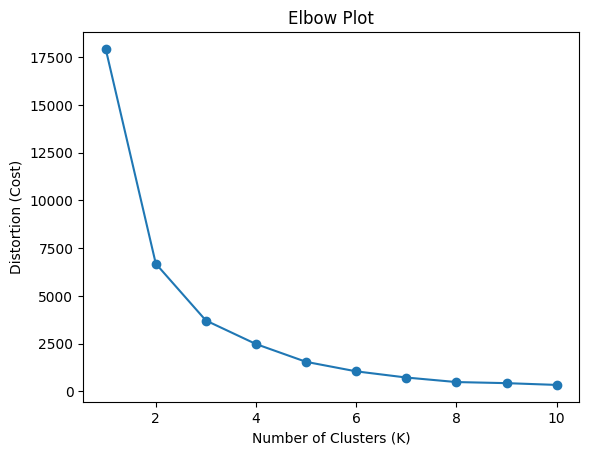

In [ ]:
# k(클러스터 개수) = 3이 적당함을 확인
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Cost)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data4cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
data_final['Cluster'] = kmeans.labels_

**결과 확인**

In [ ]:
data_final['Cluster'].value_counts()

0    887
1    135
2     15
Name: Cluster, dtype: int64

**클러스터별 밀집도 분포**

In [ ]:
data_final[data_final['Cluster']==0]['density'].describe()

count    887.000000
mean       0.591213
std        0.824371
min        0.000658
25%        0.081088
50%        0.296044
75%        0.654032
max        4.263241
Name: density, dtype: float64

In [ ]:
data_final[data_final['Cluster']==1]['density'].describe()

count    135.000000
mean       8.322041
std        2.995744
min        4.527855
25%        5.927906
50%        7.463216
75%       10.373836
max       15.192975
Name: density, dtype: float64

In [ ]:
data_final[data_final['Cluster']==2]['density'].describe()

count    15.000000
mean     23.677023
std       7.849364
min      18.323818
25%      18.323818
50%      20.747671
75%      22.389647
max      41.495342
Name: density, dtype: float64

**최종 데이터 정리**

In [ ]:
#직관적인 이해를 위해 클러스터 0,1,2에 대한 클러스터명을 재설정
data_final['Cluster'] = data_final['Cluster'].replace({0: '보통', 1: '빈번', 2: '매우 빈번'})

In [ ]:
data_final

,FCLTY_NM_x,INDUTY_NM,POSESN_MBY_NM,ROAD_NM_CTPRVN_NM,ROAD_NM_SIGNGU_NM,ROAD_NM_EMD_NM,Longitude,Latitude,popularity,SAFECHK_GNRLZ_GRAD_NM,demand_by_favor,demand_by_induty,시설 면적,density,Cluster
0,인왕배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,0,1948.434176,389.686835,529.178571,0.736399,보통
1,사직체육회,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,0,1948.434176,389.686835,529.178571,0.736399,보통
2,중앙배드민턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.963946,37.577919,1,0,1948.434176,389.686835,529.178571,0.736399,보통
3,중앙배드미턴장,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966563,37.578060,1,0,1948.434176,389.686835,529.178571,0.736399,보통
4,인왕산자연공원,간이운동장,지방자치단체,서울특별시,종로구,사직동,126.966889,37.578497,1,0,1948.434176,389.686835,529.178571,0.736399,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,서초구민체육센터수영장,수영장,지방자치단체,서울특별시,서초구,반포2동,126.991242,37.498834,3,0,332.894045,332.894045,15030.571429,0.022148,보통
1033,테스트공단20171111,수영장,지방자치단체,서울특별시,송파구,방이2동,127.107222,37.515109,3,0,451.648556,451.648556,16950.000000,0.026646,보통
1034,올림픽공원 수영경기장,수영장,국민체육진흥공단,서울특별시,송파구,오륜동,127.126571,37.520988,3,2,451.648556,451.648556,16950.000000,0.026646,보통
1035,잠실제2수영장,수영장,지방자치단체,서울특별시,송파구,잠실2동,127.075940,37.516200,3,0,451.648556,225.824278,16950.000000,0.013323,보통


In [ ]:
data_final.to_csv('clustered_data.csv')